In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from sklearn.mixture import GMM
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv', header=None)
train.columns = range(1, 41)
label = pd.read_csv('trainLabels.csv', header=None)
label.columns = ['label']
test = pd.read_csv('test.csv', header=None)
test.columns = range(1, 41)

In [3]:
train_label = train.join(label)

## Simple plotting

In [4]:
def plot2feature(df, f1, f2, label='label'):
    ## This method is used to plot a scatter plot
    ## Input
    ## df: a data frame with all features and a column for binary labels
    ## f1: label for the first feature
    ## f2: label for the second feature
    ## label: label for the binary label, default is 'label"
    for (target, c) in zip((0, 1), ('r', 'g')):
        plt.scatter(df[df[label]==target][f1], df[df[label]==target][f2], c = c, label=str(target), alpha = 0.5)
    plt.legend()
    plt.xlabel(f1)
    plt.ylabel(f2)

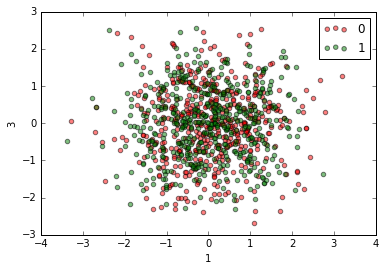

In [5]:
plot2feature(train_label, 1, 3)

In [6]:
from sklearn import cross_validation

In [7]:
x_train, x_test, y_train, y_test = cross_validation.train_test_split(train_label[range(1, 41, 1)], 
                                                                     train_label['label'], random_state = 0)

In [8]:
np.mean(y_train)

0.49866666666666665

In [9]:
np.mean(y_test)

0.544

### SVM without reducing dimensionality

In [10]:
from sklearn import svm
svm_clf = svm.SVC(kernel='linear', C=100.0)

In [11]:
svm_clf.fit(x_train, y_train)

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
svm_clf.support_.shape

(319,)

In [13]:
svm_clf.score(x_test, y_test)

0.83599999999999997

In [14]:
def fit_svm(df, features, label = 'label', kernel = 'rbf'):
    ### method to perform svm and report accuracy
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(df[features], df[label], random_state = 0)
    # svm_clf = svm.SVC(gamma=0.01)
    svm_clf = svm.SVC(kernel = kernel) 
    svm_clf.fit(x_train, y_train)
    return svm_clf.score(x_test, y_test)
    

In [15]:
fit_svm(train_label, range(1, 41))

0.90400000000000003

In [20]:
fit_svm(tr)

NameError: name 'tr' is not defined

### Check the distribution of data and scaling

In [15]:
train_label.describe()

,1,2,3,4,5,6,7,8,9,10,...,32,33,34,35,36,37,38,39,40,label
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.025596,-0.024526,-0.024088,-0.002271,1.092329,-0.006250,0.497342,-0.037883,0.026391,-0.003597,...,0.022951,-0.542491,-0.011608,-0.483507,0.033371,0.567185,0.006849,-0.892659,0.609451,0.51000
std,1.008282,1.016298,0.979109,0.970575,4.538834,0.989128,2.118819,2.232256,1.001064,1.013520,...,1.001375,2.239939,1.022456,2.121281,1.007044,2.227876,0.997635,2.022022,2.045439,0.50015
min,-3.365711,-3.492086,-2.695602,-3.460471,-16.421901,-3.041250,-7.224761,-6.509084,-3.145588,-2.749812,...,-2.971125,-7.840890,-2.999564,-7.124105,-2.952358,-5.452254,-3.473913,-8.051722,-7.799086,0.00000
25%,-0.669010,-0.693937,-0.698830,-0.617557,-1.801997,-0.732265,-0.838619,-1.604037,-0.677562,-0.682220,...,-0.696032,-2.121943,-0.664550,-1.879247,-0.642861,-1.059786,-0.691162,-2.220126,-0.565041,0.00000
50%,0.027895,-0.033194,0.008145,0.002327,0.862818,0.027041,0.582321,0.018809,0.022092,-0.036110,...,0.049778,-0.568262,-0.028097,-0.493575,0.037732,0.455474,0.038284,-0.855470,0.779944,1.00000
75%,0.762520,0.682753,0.661434,0.640743,3.843172,0.671456,1.913664,1.438304,0.741310,0.665364,...,0.699917,0.939348,0.651374,1.005795,0.691800,2.122157,0.693535,0.388698,1.992193,1.00000
max,3.326246,3.583870,2.546507,3.088738,17.565345,3.102997,7.592666,7.130097,3.145258,3.919426,...,3.688047,7.160379,3.353631,6.005818,3.420561,6.603499,3.492548,5.774120,6.803984,1.00000


In [16]:
from sklearn import preprocessing

In [17]:
train_label_scaled = pd.DataFrame(preprocessing.scale(train_label[range(1, 41)]), columns=range(1,41)).join(label)

In [19]:
fit_svm(train_label_scaled, range(1,41))

0.86399999999999999

#### Check the effect of dimensionality

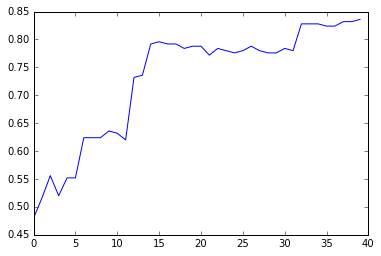

In [25]:

plt.plot([fit_svm(train_label, range(1, i+1)) for i in range(1, 41)])

#### Other metrics

In [18]:
from sklearn import cross_validation
from sklearn.metrics import classification_report

In [27]:
classification_report(y_test, svm_clf.predict(x_test))

'             precision    recall  f1-score   support\n\n          0       0.83      0.81      0.82       114\n          1       0.84      0.86      0.85       136\n\navg / total       0.84      0.84      0.84       250\n'

## gridsearchcv

In [19]:
from sklearn.grid_search import GridSearchCV

def gridsearch_svc(parameters, df, features, label='label', scores = ['accuracy']):
    ### perform gridsearchcv for svc model
    ### df: dataframe with training dataset
    ### features: list of feature labels (x's)
    ### label: column name for label (y)
    ### parameters: parameter space for gridsearchcv
    ### scores: list of scoring functions
    
    # get train and test data
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(df[features],
                                                                     df[label], random_state = 0, test_size = 0.1)
    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()

        clf = GridSearchCV(svm.SVC(), parameters, cv=3,
                           scoring=score)
        clf.fit(x_train, y_train)

        print("Best parameters set found on development set:")
        print
        print(clf.best_params_)
        print()
        print("Grid scores on development set:")
        print()
        for params, mean_score, scores in clf.grid_scores_:
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean_score, scores.std() * 2, params))
        print()

        print("Detailed classification report:")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(x_test)
        print(classification_report(y_true, y_pred))
        print()
    return clf.best_estimator_

In [20]:
# tuned_parameters = [{'C': [10, 100, 1000], 'gamma': [0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},   
#                    {'C': [1, 10, 100, 1000], 'kernel': ['linear']}]
tuned_parameters =  {'C': [1, 10, 100], 'kernel': ['linear']}


In [61]:
clf = gridsearch_svc(tuned_parameters, train_label, range(1, 41))

# Tuning hyper-parameters for accuracy
()
Best parameters set found on development set:

{'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
()
Grid scores on development set:
()
0.517 (+/-0.014) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
0.877 (+/-0.052) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.05}
0.894 (+/-0.037) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.886 (+/-0.038) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.005}
0.838 (+/-0.043) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.548 (+/-0.002) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
0.881 (+/-0.049) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.05}
0.917 (+/-0.020) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.900 (+/-0.016) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.005}
0.859 (+/-0.057) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.548 (+/-0.002) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.1}
0.881 (+/-0.049) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.05}
0.917 (+/-0.020) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
0.893 (+/-0.0

In [75]:
clf.support_vectors_.shape

(474, 40)

In [65]:
clf = gridsearch_svc(tuned_parameters, train_label_scaled, range(1, 41))

# Tuning hyper-parameters for accuracy
()
Best parameters set found on development set:

{'kernel': 'rbf', 'C': 10, 'gamma': 0.05}
()
Grid scores on development set:
()
0.851 (+/-0.038) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
0.853 (+/-0.041) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.05}
0.829 (+/-0.057) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.823 (+/-0.049) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.005}
0.817 (+/-0.053) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.853 (+/-0.038) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
0.866 (+/-0.058) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.05}
0.866 (+/-0.033) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.842 (+/-0.049) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.005}
0.826 (+/-0.054) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.853 (+/-0.038) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.1}
0.866 (+/-0.058) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.05}
0.858 (+/-0.024) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
0.852 (+/-0.0

In [72]:
clf.support_.shape

(438,)

In [66]:
clf

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Summary1
* This data set is pretty balanced.
* Straight SVM works and better than scaled (why??)
* Linear kernel is slower than rbf
* rbf kernel performs better than linear kernel

### PCA

In [21]:
scaled = pd.DataFrame(preprocessing.scale(train_label[range(1, 41)]), columns=range(1,41))

In [22]:
# scratch
# perform pca on scaled data and do svm
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
scaled_pca = pd.DataFrame(pca.fit_transform(scaled))
n_pca = scaled_pca.shape[1]
scaled_pca.columns = range(1, n_pca + 1)
scaled_pca = scaled_pca.join(label)
tuned_parameters = {'C': [1, 10, 100], 'gamma': [0.1,0.05, 0.01, 0.005, 0.001], 'kernel': ['rbf']}
gridsearch_svc(tuned_parameters, scaled_pca, range(1, n_pca+1))

# Tuning hyper-parameters for accuracy
()
Best parameters set found on development set:

{'kernel': 'rbf', 'C': 1, 'gamma': 0.05}
()
Grid scores on development set:
()
0.842 (+/-0.046) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
0.853 (+/-0.043) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.05}
0.828 (+/-0.054) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.816 (+/-0.045) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.005}
0.809 (+/-0.035) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.843 (+/-0.032) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
0.847 (+/-0.044) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.05}
0.846 (+/-0.036) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.847 (+/-0.032) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.005}
0.807 (+/-0.042) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.843 (+/-0.032) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.1}
0.847 (+/-0.044) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.05}
0.817 (+/-0.004) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
0.816 (+/-0.01

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [69]:
# scratch
# perform pca on raw data and do svm
from sklearn.decomposition import PCA
pca = PCA(n_components=0.9)
raw_pca = pd.DataFrame(pca.fit_transform(train))
n_pca = raw_pca.shape[1]
raw_pca.columns = range(1, n_pca + 1)
raw_pca = raw_pca.join(label)
tuned_parameters = {'C': [1, 10, 100], 'gamma': [0.1,0.05, 0.01, 0.005, 0.001], 'kernel': ['rbf']}
clf = gridsearch_svc(tuned_parameters, raw_pca, range(1, n_pca+1))

# Tuning hyper-parameters for accuracy
()
Best parameters set found on development set:

{'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
()
Grid scores on development set:
()
0.799 (+/-0.112) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
0.893 (+/-0.031) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.05}
0.909 (+/-0.033) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.888 (+/-0.038) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.005}
0.831 (+/-0.040) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.808 (+/-0.099) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
0.891 (+/-0.031) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.05}
0.908 (+/-0.023) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.904 (+/-0.011) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.005}
0.871 (+/-0.040) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.808 (+/-0.099) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.1}
0.891 (+/-0.031) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.05}
0.909 (+/-0.022) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
0.889 (+/-0.00

In [23]:
from sklearn.decomposition import PCA
def pca_gridsearch(pca, tuned_parameters, df, features, label='label', scores = ['accuracy']):
    ### method to perform gridsearch_svc after pca
    # input:
    #      pca: a pca object
    #      the rest is requred by gridseach_svc
    df_pca = pd.DataFrame(pca.fit_transform(df[features]))
    n_pca = df_pca.shape[1] # number of features after pca
    df_pca.columns = range(1, n_pca + 1)
    df_pca = df_pca.join(df[label])
    return gridsearch_svc(tuned_parameters, df_pca, range(1, n_pca+1), label, scores)

In [72]:
pca_gridsearch(pca, tuned_parameters, train_label, range(1, 41))

# Tuning hyper-parameters for accuracy
()
Best parameters set found on development set:

{'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
()
Grid scores on development set:
()
0.799 (+/-0.112) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
0.893 (+/-0.031) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.05}
0.909 (+/-0.033) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.888 (+/-0.038) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.005}
0.831 (+/-0.040) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.808 (+/-0.099) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
0.891 (+/-0.031) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.05}
0.908 (+/-0.023) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.904 (+/-0.011) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.005}
0.871 (+/-0.040) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.808 (+/-0.099) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.1}
0.891 (+/-0.031) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.05}
0.909 (+/-0.022) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
0.889 (+/-0.00

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Summary2
* PCA workflow.
* Raw data still performs better.
* Reducing dimension doesn't improve the accuracy. If retaining 0.9999 variance, the result is almost the same as not doing PCA.

In [24]:
## a class to handle the parameters of gridsearchcv_svm
class gridsearch:
    def __init__(self, dataframe):
        self.tuned_parameters = None
        self.features = None
        self.df = dataframe
        self.label = 'label'
        self.scores = ['accuracy']
        self.n_components = 0.999
        self.best_estimator_ = None
    
    # method to perform fitting
    def fit(self):
        ### perform gridsearchcv for svc model
        ### df: dataframe with training dataset
       
        # get train and test data
        x_train, x_test, y_train, y_test = cross_validation.train_test_split(self.df[self.features],
                                                                         self.df[self.label], random_state = 0, test_size = 0.1)
        for score in self.scores:
            print("# Tuning hyper-parameters for %s" % score)
            print()

            clf = GridSearchCV(svm.SVC(), self.tuned_parameters, cv=3,
                               scoring=score)
            clf.fit(x_train, y_train)

            print("Best parameters set found on development set:")
            print
            print(clf.best_params_)
            print()
            print("Grid scores on development set:")
            print()
            for params, mean_score, scores in clf.grid_scores_:
                print("%0.3f (+/-%0.03f) for %r"
                      % (mean_score, scores.std() * 2, params))
            print()

            print("Detailed classification report:")
            print()
            print("The model is trained on the full development set.")
            print("The scores are computed on the full evaluation set.")
            print()
            y_true, y_pred = y_test, clf.predict(x_test)
            print(classification_report(y_true, y_pred))
            print()
        self.best_estimator_ = clf.best_estimator_
    
    # method to perform PCA transform in place, also update the features
    def pca_inplace(self):
        pca = PCA(self.n_components)
        df_pca = pd.DataFrame(pca.fit_transform(self.df[self.features]))
        n_pca = df_pca.shape[1] # number of features after pca
        df_pca.columns = range(1, n_pca + 1)
        self.df = df_pca.join(self.df[self.label])
        self.features = range(1, n_pca + 1)

In [112]:
# use gridsearch class to perform fitting
gd = gridsearch(train_label_scaled)
gd.tuned_parameters = tuned_parameters = {'C': [1, 10, 100], 'gamma': [0.1,0.05, 0.01, 0.005, 0.001], 'kernel': ['rbf']}
gd.features = range(1, 41)
gd.fit()

# Tuning hyper-parameters for accuracy
()
Best parameters set found on development set:

{'kernel': 'rbf', 'C': 10, 'gamma': 0.05}
()
Grid scores on development set:
()
0.851 (+/-0.038) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
0.853 (+/-0.041) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.05}
0.829 (+/-0.057) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.823 (+/-0.049) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.005}
0.817 (+/-0.053) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.853 (+/-0.038) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
0.866 (+/-0.058) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.05}
0.866 (+/-0.033) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.842 (+/-0.049) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.005}
0.826 (+/-0.054) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.853 (+/-0.038) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.1}
0.866 (+/-0.058) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.05}
0.858 (+/-0.024) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
0.852 (+/-0.0

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [166]:
# combine gridsearch class and pca
gd = gridsearch(train_label)
gd.features = range(1, 41)
gd.n_components = 12
gd.pca_inplace()
gd.tuned_parameters = tuned_parameters = {'C': [1, 10, 100], 'gamma': [0.1,0.05, 0.01, 0.005, 0.001], 
                                          'kernel': ['rbf']}
gd.fit()

# Tuning hyper-parameters for accuracy
()
Best parameters set found on development set:

{'kernel': 'rbf', 'C': 10, 'gamma': 0.005}
()
Grid scores on development set:
()
0.876 (+/-0.059) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
0.910 (+/-0.016) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.05}
0.914 (+/-0.041) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.890 (+/-0.043) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.005}
0.833 (+/-0.032) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.879 (+/-0.052) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
0.916 (+/-0.011) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.05}
0.914 (+/-0.006) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.918 (+/-0.011) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.005}
0.871 (+/-0.053) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.879 (+/-0.052) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.1}
0.916 (+/-0.011) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.05}
0.908 (+/-0.009) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
0.898 (+/-0.

In [74]:
# Use raw data
gd = gridsearch(train_label)
gd.tuned_parameters = tuned_parameters = {'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01,  0.001], 'kernel': ['rbf']}
gd.features = range(1, 41)
gd.fit()

# Tuning hyper-parameters for accuracy
()
Best parameters set found on development set:

{'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
()
Grid scores on development set:
()
0.506 (+/-0.002) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 1}
0.506 (+/-0.002) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.1}
0.832 (+/-0.026) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.01}
0.794 (+/-0.037) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.001}
0.506 (+/-0.002) for {'kernel': 'rbf', 'C': 1, 'gamma': 1}
0.517 (+/-0.014) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
0.894 (+/-0.037) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.838 (+/-0.043) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.506 (+/-0.002) for {'kernel': 'rbf', 'C': 10, 'gamma': 1}
0.548 (+/-0.002) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
0.917 (+/-0.020) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.859 (+/-0.057) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
()
Detailed classification report:
()
The model is trained on the full development s

In [25]:
# prediction and saving
def test_save(estimator, test):
    num = test.shape[0]
    test_label = pd.DataFrame({"Id": range(1,num+1), "Solution": estimator.predict(test)}, index=None)
    test_label.to_csv('./test_label-'+str(datetime.date.today())+'.csv', index = None)

In [149]:
test_save(gd.best_estimator_, test)

In [115]:
# combine gridsearch class and pca
gd.pca_inplace()
gd.fit()

# Tuning hyper-parameters for accuracy
()
Best parameters set found on development set:

{'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
()
Grid scores on development set:
()
0.517 (+/-0.014) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.1}
0.877 (+/-0.052) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.05}
0.894 (+/-0.037) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
0.886 (+/-0.038) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.005}
0.838 (+/-0.043) for {'kernel': 'rbf', 'C': 1, 'gamma': 0.001}
0.548 (+/-0.002) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.1}
0.881 (+/-0.049) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.05}
0.917 (+/-0.020) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.01}
0.900 (+/-0.016) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.005}
0.859 (+/-0.057) for {'kernel': 'rbf', 'C': 10, 'gamma': 0.001}
0.548 (+/-0.002) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.1}
0.881 (+/-0.049) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.05}
0.917 (+/-0.020) for {'kernel': 'rbf', 'C': 100, 'gamma': 0.01}
0.893 (+/-0.0

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Summary2
* Made a test submission with the predictor using svm (no pca or scaling), and the accuracy is about 91%, comparable with the result from cross-validation. This is not a great score.
* Based on this blog (http://elenacuoco.altervista.org/blog/archives/1167), random forest can reach almost 99%, but GMM is needed to transform the input features.

In [26]:
# Try random forest
from sklearn.ensemble import RandomForestClassifier
def fit_randomforest(df, features, max_features, label = 'label'):
    ### method to perform svm and report accuracy
    x_train, x_test, y_train, y_test = cross_validation.train_test_split(df[features], df[label], random_state = 0)
    rf_clf = RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=5, min_samples_split=1,
  min_samples_leaf=3, max_features=max_features,    bootstrap=False, oob_score=False, n_jobs=1, random_state=33,
  verbose=0) 
    rf_clf.fit(x_train, y_train)
    return rf_clf.score(x_test, y_test)
    

In [27]:
for n in range(1, 41):
    print fit_randomforest(train_label, range(1, 41), n)

0.796
0.812
0.816
0.82
0.84
0.836
0.836
0.84
0.852
0.848
0.852
0.852
0.848
0.848
0.852
0.852
0.848
0.848
0.856
0.848
0.844
0.84
0.844
0.84
0.84


KeyboardInterrupt: 

In [30]:
x_all = x_train.append(x_test)
x_all.values

array([[ 0.77147819,  0.61563317, -1.99300318, ..., -1.05017228,
        -0.77530532, -0.38070158],
       [-0.30945517,  1.53409344, -1.08409627, ...,  0.43182273,
         1.18375205,  2.58760961],
       [ 0.56251975,  0.88094879,  0.10181214, ..., -0.20523439,
        -1.48716119,  1.02473035],
       ..., 
       [ 1.19222208, -0.41437073,  0.06705418, ...,  0.6564375 ,
        -0.93247282,  2.9874358 ],
       [ 1.50622633,  0.14599688,  0.42849583, ...,  1.97195112,
        -1.29560131, -1.15846118],
       [ 0.17513613, -0.66114704, -2.09535416, ...,  0.10653325,
        -3.21961479, -0.72449445]])

In [35]:
len(bic)

155

In [59]:
# Perform GMM on full test data to get clusters
# http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_selection.html#example-mixture-plot-gmm-selection-py
#x_all = x_train.append(x_test)
x_all = train.append(test)
x_all = x_all.values

lowest_bic = np.infty
bic = []
n_components_range = range(2, 20)
cv_types = ['spherical', 'tied', 'diag', 'full']
for cv_type in cv_types:
    for n_components in n_components_range:
        # Fit a mixture of Gaussians with EM
        gmm = GMM(n_components=n_components, covariance_type=cv_type)
        gmm.fit(x_all)
        bic.append(gmm.aic(x_all)) # aic is used. Wiki suggests that aic is better than bic
        if bic[-1] < lowest_bic:
            lowest_bic = bic[-1]
            best_gmm = gmm

In [60]:
# Check best_gmm
best_gmm
#plt.plot(bic)

GMM(covariance_type='full', init_params='wmc', min_covar=0.001,
  n_components=4, n_init=1, n_iter=100, params='wmc', random_state=None,
  thresh=None, tol=0.001, verbose=0)

In [95]:
# Fit with randomforest
x_train_gmm = best_gmm.predict_proba(x_train)
# clf=RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=5, min_samples_split=1,
#  min_samples_leaf=3, max_features='auto',    bootstrap=False, oob_score=False, n_jobs=1, random_state=33,
#  verbose=0)
clf=RandomForestClassifier(n_estimators=1000, criterion='entropy', max_depth=5)

clf.fit(x_train_gmm, y_train)
clf.score(best_gmm.predict_proba(x_test), y_test)

1.0

In [63]:
test_save(clf, best_gmm.predict_proba(test))

In [77]:
# Fit with svm. The result is very bad. Something is wrong.
tuned_parameters = {'C': [0.1, 0.3, 0.5], 'gamma': [1, 0.8, 0.6, 0.4, 0.1], 'kernel': ['rbf']}
x_train_gmm_df = pd.DataFrame(x_train_gmm)
x_train_gmm_df = x_train_gmm_df.join(label)
gmm_svm = gridsearch(x_train_gmm_df)
gmm_svm.features = range(best_gmm.n_components)
gmm_svm.tuned_parameters = tuned_parameters
gmm_svm.fit()

# Tuning hyper-parameters for accuracy
()
Best parameters set found on development set:

{'kernel': 'rbf', 'C': 0.3, 'gamma': 1}
()
Grid scores on development set:
()
0.513 (+/-0.042) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 1}
0.502 (+/-0.019) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.8}
0.502 (+/-0.019) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.6}
0.505 (+/-0.010) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.4}
0.508 (+/-0.002) for {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.1}
0.526 (+/-0.053) for {'kernel': 'rbf', 'C': 0.3, 'gamma': 1}
0.526 (+/-0.053) for {'kernel': 'rbf', 'C': 0.3, 'gamma': 0.8}
0.526 (+/-0.053) for {'kernel': 'rbf', 'C': 0.3, 'gamma': 0.6}
0.526 (+/-0.053) for {'kernel': 'rbf', 'C': 0.3, 'gamma': 0.4}
0.505 (+/-0.010) for {'kernel': 'rbf', 'C': 0.3, 'gamma': 0.1}
0.526 (+/-0.053) for {'kernel': 'rbf', 'C': 0.5, 'gamma': 1}
0.526 (+/-0.053) for {'kernel': 'rbf', 'C': 0.5, 'gamma': 0.8}
0.526 (+/-0.053) for {'kernel': 'rbf', 'C': 0.5, 'gamma': 0.6}
0.526 (+/-0.053) for

In [82]:
x_train_gmm_df.groupby('label').std()

,0,1,2,3
label,,,,
0,0.435048,0.425664,0.427447,0.442661
1,0.398971,0.443867,0.432187,0.441496


In [94]:
# pca + gmm + svm
pca = PCA(n_components=12)
raw_pca = pd.DataFrame(pca.fit_transform(train))
n_pca = raw_pca.shape[1]
raw_pca.columns = range(1, n_pca + 1)
raw_pca = raw_pca.join(label)
tuned_parameters = {'C': np.arange(0.1, 5, 0.5), 'gamma': np.arange(0.1, 1, 0.1), 'kernel': ['rbf']}
gmm = GMM(n_components= 4, covariance_type= 'full')
gmm.fit(raw_pca[range(1, n_pca+1)])
x_train_gmm = gmm.predict_proba(raw_pca[range(1, n_pca+1)])
x_train_gmm_df = pd.DataFrame(x_train_gmm)
x_train_gmm_df = x_train_gmm_df.join(label)
clf = gridsearch_svc(tuned_parameters, x_train_gmm_df, range(4))
test_save(clf, gmm.predict_proba(pca.transform(test))) # 0.98908 final score

# Tuning hyper-parameters for accuracy
()
Best parameters set found on development set:

{'kernel': 'rbf', 'C': 1.5999999999999999, 'gamma': 0.90000000000000002}
()
Grid scores on development set:
()
0.987 (+/-0.005) for {'kernel': 'rbf', 'C': 0.10000000000000001, 'gamma': 0.10000000000000001}
0.987 (+/-0.005) for {'kernel': 'rbf', 'C': 0.10000000000000001, 'gamma': 0.20000000000000001}
0.987 (+/-0.005) for {'kernel': 'rbf', 'C': 0.10000000000000001, 'gamma': 0.30000000000000004}
0.987 (+/-0.005) for {'kernel': 'rbf', 'C': 0.10000000000000001, 'gamma': 0.40000000000000002}
0.987 (+/-0.005) for {'kernel': 'rbf', 'C': 0.10000000000000001, 'gamma': 0.5}
0.987 (+/-0.005) for {'kernel': 'rbf', 'C': 0.10000000000000001, 'gamma': 0.60000000000000009}
0.987 (+/-0.005) for {'kernel': 'rbf', 'C': 0.10000000000000001, 'gamma': 0.70000000000000007}
0.987 (+/-0.005) for {'kernel': 'rbf', 'C': 0.10000000000000001, 'gamma': 0.80000000000000004}
0.988 (+/-0.008) for {'kernel': 'rbf', 'C': 0.1000000000

In [88]:
clf

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Summary
* Using x_train + x_test (=train) to fit GMM and then perform random forest with x_train, the accuracy is 0.996 with x_test. This seems unrealistic.
* Using train + test to fit GMM, very time consuming. Perform random forest with x_train, the accuracy is about 1 with x_test. This is probably a sign of overfitting. The score using test data is 0.99145.
* Using x_train + x_test to perform PCA, followed by GMM and SVM. The score using test data is 0.98892